<a href="https://colab.research.google.com/github/Fernando-Guerrero-Diaz/ADA-Informes/blob/main/MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Problema del Ordenamiento
**Entrada:** arreglo con n elementos numéricos. $[a_1, a_2, ... a_n]$

**Salida:** arreglo con los mismos elementos ordenados de menor a mayor. $[a_1', a_2', ... a_n']$ tal que $a_i'\leq a_{i+1}'$ para todo $ 0 \leq i < n$

En el problema del ordenamiento se busca ordenar los elementos de un arreglo de forma rápida y eficiente. Debido a que los algoritmos de ordenamiento como bubbleSort, SelectionSort e InsertionSort tienen tiempos de ejecución de $O(n^2)$, el cual puede ser muy costoso con entradas muy grandes, es deseable un algoritmo de ordenamiento con tiempos de ejecuciones menores.

El MergeSort surge como una alternativa atractiva, ya que en teoría tiene un tiempo de ejecución de $O(nlog(n))$. Este informe demostrará MergeSort y su eficiencia.

#2.Función Merge
Antes que nada, para implementar a MergeSort es necesario definir a la función Merge, la cual es llamada en cada recursión del algoritmo. Merge se encargará de unir en orden dos subarreglos contiguos ya ordenados, tomando como entrada al arreglo principal y tres índices para delimitar los subarreglos correspondientes.



##2.1 Código
A continuación se presenta una implementación de la función Merge.

In [3]:
def merge(array, start, mid, end):
    aux = []
    a = start #Las variables 'a' y 'b' van a apuntar a la posición de los subarreglos array[start:mid] y array[mid:end] respectivamente.
    b = mid 
    counter = 0
    while (True):

        if (array[a] <= array[b]): #Aquí se comparan los valores de array[a] y array [b]. El que es menor es insertado al final del arreglo auxiliar, y se aumenta el valor del indice a o b correspondiente
            counter+=1
            aux.append(array[a])
            a+=1
        if (array[b] < array[a]):
            counter+=1
            aux.append(array[b])
            b+=1

        if (a == mid): #Estas condiciones se cumplen una vez hayamos recorrido la totalidad de uno de los subarreglos.
            while(b != end): #Estos while loops permiten insertar el resto del otro subarreglo en el auxiliar
                aux.append(array[b])
                b+=1
            break #Estos breaks permiten salir del while loop inicial
        
        if (b == end):
            while (a != mid):
                aux.append(array[a])
                a+=1
            break
    
    for i in range(len(aux)): #Los valores ordenados en el arreglo auxiliar son guardados en el arreglo original mediante este loop
        array[start+i] = aux[i]
    return counter


x = [20, 50, 2, 19, 1, 5, 3, 4]
print(x)
y= merge(x,0,2,4)
print("ordenando los subarreglos [20, 50] y [2, 19]")
print(x)
y= y + merge(x,4,6,8)
print("ordenando los subarreglos [1, 5] y [3, 4]")
print(x)
y= y + merge(x,0,4,8)
print("ordenando subarreglos [2, 19, 20, 50] y [1, 3, 4, 5]")

print(x)
print("Comparaciones:", y)

[20, 50, 2, 19, 1, 5, 3, 4]
ordenando los subarreglos [20, 50] y [2, 19]
[2, 19, 20, 50, 1, 5, 3, 4]
ordenando los subarreglos [1, 5] y [3, 4]
[2, 19, 20, 50, 1, 3, 4, 5]
ordenando subarreglos [2, 19, 20, 50] y [1, 3, 4, 5]
[1, 2, 3, 4, 5, 19, 20, 50]
Comparaciones: 10


##2.2 Descripción del algoritmo Merge

El algoritmo merge recibe como entrada a un arreglo $arr$ con $n$ elementos. También recibe como entrada a tres índices correspondientes a posiciones en el arreglo ($start$, $mid$ y $end$), asegurándonos que los subarreglos $arr[start:mid]$ y $arr[mid:end]$ estén ordenados. Este es un prerequisito para usar Merge.

1. Primero, creamos un arreglo auxiliar vacío $aux$, y creamos 2 variables $a$ y $b$ que apuntan a $start$ y $mid$ respectivamente. También creamos una variable $counter$, contadora de las comparaciones. 

2. Entramos a un bucle usando $while(True)$. En cada iteración, comparamos el valor de $arr[a]$ con $arr[b]$, e insertamos el valor menor al final del arreglo $aux$. Luego aumentamos el valor de $a$ ó $b$ respectivamente, dependiendo de cual fue insertado. $counter$ aumenta después de cada comparación.

3. Se sigue iterando hasta que $a=mid$ o $b=end$. Esto significa que hemos recorrido por completo uno de los dos subarreglos, por lo que no hay necesidad de seguir comparando. Entramos a otro bucle para insertar el resto del otro subarreglo en el $aux$ y finalmente se sale del bucle inicial con un $break$.

4. Finalmente, los valores de $aux$, ya ordenados, son guardados en el arreglo original, en las posiciones correspondientes. Se retorna el valor de $counter$.

##2.3 Ejemplo

Digamos que tenemos al siguiente arreglo de 6 elementos.

$X= [1,3,2,4]$

Este arreglo esta compuesto por los subarreglos $[1,3]$ y $[2,4]$, los cuales se encuentran ordenados. Llamamos a merge con los parametros correspondientes, e inicializamos el arrelgo auxiliar $aux$  los iteradores $a$ y $b$, cada uno indicando al principio del subarreglo correspondiente.

$a=0;b=2; aux=[]$

Comparamos $X[a]$ con $X[b]$. El valor menor es insertado en $aux$.

$a= 0; X[a] = 1;$

$b= 2;  X[b] = 2;$

$1<2; ->aux=[1]$

Ya que el valor en $a$ fue insertado, lo aumentamos por uno y realizamos la misma comparacion otra vez. Esta vez, el valor de $X[b]$ será menor e insertado en $aux$.

$a= 1; X[a] = 3;$

$b= 2;  X[b] = 2;$

$3>2; ->aux=[1,2]$

Tercera comparación.

$a= 1; X[a] = 3;$

$b= 3;  X[b] = 4;$

$3<4; ->aux=[1,2,3]$

Al insertar este ultimo elemento, hemos terminado de recorred el primer subarreglo, por lo que lo unico que nos queda es insertar el resto del segundo subarreglo.

$b = 3; X[b] = 4; -> aux=[1,2,3,4]$

Por ultimo, los valores de $aux$ son copiados en $X$.

$X=[1,2,3,4]$

Terminamos pues, con un arreglo ordenado de inicio a fin.


#3. función MergeSort

Ya implementado Merge, podemos implementar a MergeSort, con el código siguiente.

##3.1 Código

In [4]:
import random


def MergeSort(array, start, end,verbose=False):
    if start>=end : 
      return 0
    counter = 0
    mid = start + int((end-start)/2)
    if mid==start:
      return 0
    global recursions 
    recursions += 1
    if verbose: print("Llamando MergeSort para el subarreglo", array[start:mid])
    counter = MergeSort(array,start,mid,verbose)
    if verbose: print("Llamando MergeSort para el subarreglo", array[mid:end])
    recursions += 1
    counter = counter + MergeSort(array,mid,end,verbose)
    if verbose: print("LLamando a merge con los subarreglos", array[start:mid], "y", array[mid:end])
    counter = counter + merge(array,start,mid,end)
    if verbose: print("Subarreglo ordenado resultante:", array[start:end])
    if verbose: print("estado del arreglo:", array)
    return counter



a = random.sample(range(1, 200), 100)
recursions=0
print("Entrada:", a)
c=MergeSort(a,0,len(a))
print("Salida:",a)
print("# de elementos:", len(a))
print("Comparaciones:", c)
print("llamadas recursivas:", recursions)

Entrada: [80, 178, 144, 112, 194, 34, 113, 21, 81, 121, 153, 87, 170, 18, 168, 24, 27, 75, 14, 154, 57, 148, 134, 163, 142, 95, 13, 92, 69, 177, 77, 1, 43, 198, 183, 115, 40, 31, 174, 172, 110, 197, 162, 129, 176, 94, 118, 29, 12, 124, 147, 190, 91, 140, 59, 102, 180, 68, 2, 130, 60, 79, 9, 167, 89, 37, 45, 70, 84, 58, 67, 122, 187, 74, 143, 131, 16, 192, 62, 32, 155, 137, 63, 175, 30, 109, 181, 189, 97, 96, 100, 156, 196, 186, 56, 90, 23, 10, 25, 72]
Salida: [1, 2, 9, 10, 12, 13, 14, 16, 18, 21, 23, 24, 25, 27, 29, 30, 31, 32, 34, 37, 40, 43, 45, 56, 57, 58, 59, 60, 62, 63, 67, 68, 69, 70, 72, 74, 75, 77, 79, 80, 81, 84, 87, 89, 90, 91, 92, 94, 95, 96, 97, 100, 102, 109, 110, 112, 113, 115, 118, 121, 122, 124, 129, 130, 131, 134, 137, 140, 142, 143, 144, 147, 148, 153, 154, 155, 156, 162, 163, 167, 168, 170, 172, 174, 175, 176, 177, 178, 180, 181, 183, 186, 187, 189, 190, 192, 194, 196, 197, 198]
# de elementos: 100
Comparaciones: 545
llamadas recursivas: 198


##3.2 Descripción del algoritmo MergeSort

El algoritmo MergeSort tiene como entrada a un arreglo $array$, y dos índices $start$ y $end$ para indicar el inicio y final del subarreglo de $array$ que queremos ordenar. También puede recibir un parametro adicional $verbose$, que permite imprimir en pantalla lo que sucede en cada iteración.

1. Primero, se tienen unas condiciones de termino. Si el subarreglo es de un solo elemento, se retorna un 0. 
2. Ahora, se calcula un índice $mid$ entre $start$ y $end$. 
3. Se llama de modo recursivo a MergeSort, dandole como entrada al arreglo $array$ y a los índices $start$ y $mid$. Tambien se entrega a $verbose$, en caso de que sea True. El valor de retorno de este MergeSort es guardado en $counter$.
4. Se llama a MergeSort una vez mas, pero esta vez con los índices $mid$ y $end$. El valor de retorno se suma a $counter$.
5. Ya que llamamos a MergeSort, podemos asumir que los subarreglos $array[start:mid]$ y $array[mid:end]$ estan ordenados. Ahora, se llama a la función Merge, dándole como parametros a $array$, $start$, $mid$, y $end$. El valor que retorna se suma a $counter$
6. Finalmente, retornamos el valor de $counter$, que cuenta el numero de comparaciones realizadas por esta iteraction y las llamadas recursivas que realizó.


##3.3 Ejemplo

A modo de ejemplo, explicaremos a MergeSort usando como entrada al siguiente arreglo en su totalidad.

$X=[48,20,36,8]$

Durante la ejecución de MergeSort, llamaremos a MergeSort de nuevo dos veces, esta vez con los siguientes subarreglos:

$Y1=[48,20]; Y2=[36,8]$

En cada una de estas dos llamadas, llamamos nuevamente a MergeSort con los subarreglos que corresponden a las mitades.

$Z1=[48]; Z2=[20]; Z3=[36]; Z1=[8]; $ 

Sin embargo, como los arreglos quedaron de un elemento, se retorna a la llamada superior y se ordenan los arreglos mediante función merge.

$Y1=[20,48]; Y2 = [8,36]$

Y finalmente, estos subarreglos ordenados son combinados con la función merge en la llamada inicial.

$X=[8,20,36,48]$

Terminando con un arreglo ordenado por completo.




##3.4 Ejecución paso a paso (`verbose=True`)

A continuación se demuestra como funciona MergeSort paso a paso usando la variable $verbose$.

In [5]:
a = random.sample(range(1, 100), 6)
recursions = 0
print("Entrada:", a)
c=MergeSort(a,0,len(a),True)
print("# de elementos:", len(a))
print("Comparaciones:", c)
print("llamadas recursivas:", recursions)

Entrada: [31, 40, 30, 53, 78, 50]
Llamando MergeSort para el subarreglo [31, 40, 30]
Llamando MergeSort para el subarreglo [31]
Llamando MergeSort para el subarreglo [40, 30]
Llamando MergeSort para el subarreglo [40]
Llamando MergeSort para el subarreglo [30]
LLamando a merge con los subarreglos [40] y [30]
Subarreglo ordenado resultante: [30, 40]
estado del arreglo: [31, 30, 40, 53, 78, 50]
LLamando a merge con los subarreglos [31] y [30, 40]
Subarreglo ordenado resultante: [30, 31, 40]
estado del arreglo: [30, 31, 40, 53, 78, 50]
Llamando MergeSort para el subarreglo [53, 78, 50]
Llamando MergeSort para el subarreglo [53]
Llamando MergeSort para el subarreglo [78, 50]
Llamando MergeSort para el subarreglo [78]
Llamando MergeSort para el subarreglo [50]
LLamando a merge con los subarreglos [78] y [50]
Subarreglo ordenado resultante: [50, 78]
estado del arreglo: [30, 31, 40, 53, 50, 78]
LLamando a merge con los subarreglos [53] y [50, 78]
Subarreglo ordenado resultante: [50, 53, 78]
e

#4. Correctitud

Para probar la correctitud de el algoritmo MergeSort, primero debemos probar la correctitud de Merge.

##4.1 Correctitud de Merge

### **Teorema (Correctitud)**

*El algoritmo **merge** recibe dos sub arreglos contiguos,$arr[start:mid]$ y $arr[mid:end]$, los cuales se encuentran individualmente ordenados, y ordena los elementos, guardandolos en el espacio del arreglo representado por $arr[start,end]$.*

## Prueba del Teorema

Probaremos pues la siguiente **propiedad invariante del bucle** con `merge`:

>Al comienzo de cada iteración $i$, los primeros $i$ elementos del arreglo auxiliar $aux$ se encuentran ordenados de menor a mayor.

**Inicialización:**
Al comienzo de la iteración $0$, el arreglo auxiliar está vacío, por lo que trivialmente está ordenado. Seguirá ordenado cuando le insertemos el menor valor entre $arr[start:mid]$ y $a[mid:end]$.

**Mantención:**
Aplicando inducción, consideremos que se cumple la propiedad al empezar cada iteración $i$. El arreglo auxiliar esta ordenado desde $aux[0]$ hasta $aux[i-1]$. 

El valor que vamos a guardar en $aux[i]$ va a ser el menor de lo que queda sin guardar de los subarreglos ordenados. Por comodidad, llamemoslos $A$ y $B$, de modo que $A =arr[start:mid]; B = arr[mid:end]$. Digamos también que $a$ y $b$ son índices de A y B que indican el menor elemento sin insertar.

Si $aux[i-1]$ originó del subarreglo $A$ ($aux[i-1] = A[a-1]$), entonces hay 2 posibilidades.

1. Si $A[a] =< B[b]$, el valor guardado en $aux[i]$ será $A[a]$. Ya que $A$ estaba ordenado, podemos asegurar de que $A[a-1] =< A[a]$, por lo tanto, $aux[i-1] =< aux[i]$. Como $aux$ está ordenado hasta $aux[i-1]]$, entonces el arreglo está ordenado hasta $aux[i]$.

2. Si $A[a] > B[b]$, el valor guardado en $aux[i]$ será $B[b]$. Pero como sabemos de que en la iteración anterior el valor insertado provino de $A$, el iterador $b$ es el mismo en esta iteración y la anterior. Ya que el valor que se inserta es el menor, la comparación anterior demuestra de que $A[a-1] =< B[b]$. Por lo tanto $aux[i-1] =< aux[i]$. Por la misma logica anterior, el arreglo auxiliar queda ordenado.

Esto se cumple para el caso con el otro arreglo también. Por ende, el arreglo auxiliar está ordenado hasta $i$.

**Correctitud:**
Como la propiedad invariante del bucle se mantiene verdadera desde su inicio hasta el final, podemos asegurar que al finalizar la última iteración del algoritmo, se termina con un arreglo ordenado de menor a mayor.



##4.2 Correctitud de MergeSort


### **Teorema (Correctitud)**

*El algoritmo **MergeSort** retorna un arreglo: $[a_1',a_2',...,a_n']$, tomando los elementos del arreglo de entrada y ordenándolos de menor a mayor, de modo que se cumpla $a_i'\leq a_{i+1}'$ para todo $ 0 \leq i < n$.*

##Prueba del Teorema
Usaremos inducción matemática para probar este teorema. Si esta declaración la denominamos $P(n)$ para un arreglo de $n$ elementos, entonces debemos probar que se cumple para los siguientes casos:

1. $P(1)$. El caso base, cuando lo que recibe es un arreglo con un solo elemento. Como sabemos segun el código, cuando el arreglo solo tiene un elemento, se retorna así nomas. Y trivialmente, sabemos que un arreglo de un elemento se encuentra de por sí ordenado.$P(1)$ es verdadero.

2. Si $m < n$ y $P(m)$ es verdadero, entonces $P(n)$ es verdadero. Como sabemos, la función se llama a si mísma dos veces, con arreglos de tamaño $m = n/2$. Si $P(m)$ es verdadero, entonces los subarreglos quedan ordenados, y como sabemos que **Merge** es un algoritmo correcto, lo que resulte cuando **Merge** combine a estos subarreglos será un arreglo ordenado. Por lo tanto, $P(n)$ es verdadero. 

Como ambos casos son verdaderos, **MergeSort** es correcto.


#5.1 Tiempo de Ejecución

###**Teorema(Tiempo de ejecución)** 

*El algoritmo **MergeSort** tiene un tiempo de ejecución de $O(nlgn)$.*

##Prueba del Teorema

Digamos que $T(n)$ es el tiempo de ejecución de **MergeSort** para un arreglo de $n$ elementos. Sabemos que cuando llamamos a **MergeSort** con un arreglo de $1$ elemento, el algoritmo retorna inmediatamente, por lo que podemos asegurar que $T(1) = c$, donde $c$ es una constante.

Sabemos también que en casos generales, **MergeSort** se llama recursivamente dos veces con arreglos de $n/2$ elementos, y además que llama a la función **merge*, que tiene un tiempo de ejecución $cn$.

Por lo tanto, podemos decir que:

$T(n) = 2T(n/2) + cn, n>1$

$T(n) = c, n=1$

Para analizar el tiempo real de esta expresión utilizaremos **arbol de recurrencia** que surge cuando descomponemos la expresión de la siguiente forma:

![image](https://i.imgur.com/yMNwCMv.png)

Expandiendo el árbol hasta llegar al caso base, se ve lo siguiente:

![image](https://i.imgur.com/XesWsex.png)

Como se aprecia en la imagen, en cada nivel del arbol el tiempo de ejecución es $cn$, y el número de niveles se expresa como $lgn$.

$lgn$ es notación que significa el logaritmo en base $2$ de $n$, y tiene sentido pues este indica la cantidad de veces que podemos dividir a $n$ por $2$ antes de llegar a la unidad. Para $n = 8, lgn = 3$. Para$ n =16, lgn=4,$ etcetera.

Para calcular el tiempo total, se multiplica el tiempo de quada nivel del arbol por la cantidad de niveles que hay. por lo tanto, $T(n) =cnlgn$. Y en tiempos asintóticos, $T(n) = O(nlgn)$.

Por ende, el teorema es correcto.

#6. Experimentos
##6.1. "Mejor" y "Peor" caso

Analizando el codigo, es dificil definir un mejor y peor caso, ya que el algoritmo se llama recursivamente sin siquiera ver los contenidos del arreglo. 

Por lo tanto, asumamos que el mejor caso es cuando el arreglo ya está ordenado, y que el peor caso es cuando está ordenado pero al revés. Si hay una gran diferencia en el numero de comparaciones que favorezcan al mejor caso teórico, diremos que si existe mejor y peor caso.En caso contrario, diremos que no existe mejor caso.

Estos casos serán comparados con un caso de entradas aleatorias, y con un caso de arreglo casi ordenado.

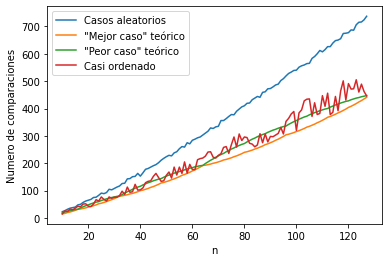

In [22]:
import matplotlib.pyplot as plt

x=[n for n in range(10,128)] 
y=[];
y1=[]; 
y2=[];
y3=[];
for n in range(10,128):

  a = random.sample(range(1, 300), n) #Arreglo de entrada aleatoria
  c=MergeSort(a,0,len(a))
  y.append(c)

  c=MergeSort(a,0,len(a)) #Mejor caso usando arreglo ordenado
  y1.append(c)

  a=a[::-1] #inversion del arreglo ordenado para peor caso
  c=MergeSort(a,0,len(a))
  y2.append(c)

  m =random.choice(range(1,n))
  a[0], a [m] = a[m], a[0] #Creacion de arreglo casi ordenado, cambiando un elemento aleatorio con el primer elemento del arreglo
  c=MergeSort(a,0,len(a))
  y3.append(c)
  
  
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Casos aleatorios",'"Mejor caso" teórico','"Peor caso" teórico', "Casi ordenado"])

plt.xlabel('n')
plt.ylabel('Numero de comparaciones')
plt.show()

##Análisis de resultado

Segun el gráfico, podemos aseverar de que el mejor caso, efectivamente, existe. Esto se debe a que si dividimos a un arreglo ordenado en dos y le decimos a **Merge** que los una, **Merge** va a recorrer al subarreglo inferior en su totalidad antes de insertar automáticamente al subarreglo superior, en cuyo caso no es necesario hacer mas comparaciones.

Algo similar, entonces, debe pasar en lo que supusimos como "peor" caso. Se recorre uno de los arreglos en su totalidad antes de insertar el resto. Este peor caso resulto no ser verdadero.

Al parecer, el peor caso es claramente cuando se tienen entradas aleatorias. Se nota que cuando el arreglo esta semi ordenado, la cantidad de comparaciones es menor.

Curiosamente, se ve que los casos con arreglo ordenado y ordenado inverso son iguales en número de comparaciones cuando n es una potencia de 2.

##6.2 MergeSort vs InsertionSort

A continuación, compararemos experimentalmente los tiempos de ejecución de **MergeSort** comparado con **InsertionSort**

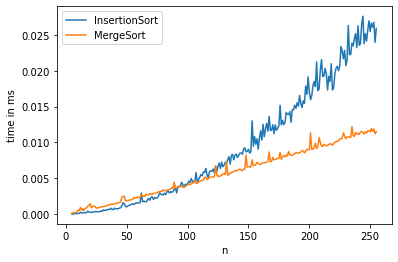

In [29]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def InsertionSort(arreglo): #Implementación simple de InsertionSort
    n = len(arreglo)
    for i in range (1,n):
        aux = arreglo[i] 
        j = i-1 
        while (j>=0 and aux < arreglo[j]): 
            arreglo[j+1] = arreglo[j] 
            j=j-1
        arreglo[j+1] = aux 
    return arreglo

x=[] 
y1=[]
y2=[]

for n in range(5,256):

  a = random.sample(range(1, 1000), n) #Entrada para InsertionSort
  b = a.copy() #Copia profunda del mismo arreglo como entrada para MergeSort
  t1 = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({b},{0},{len(b)})", repeat=1, number=10)
  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["InsertionSort", "MergeSort"])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##Análisis del resultado
Al principio del gráfico, se aprecia que **InsertionSort** es mas rápido que **MergeSort** para valores menores a $100$, aproximadamente. Sin embargo, a medida que $n$ sigue creciendo, el tiempo de **InsertionSort** crece exponencialmente, como es de esperar con su tiempo de ejecución $O(n^2)$. **MergeSort** es pues una mejor alternativa cuando se quieren ordenar una cantidad mayor de elementos.